In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

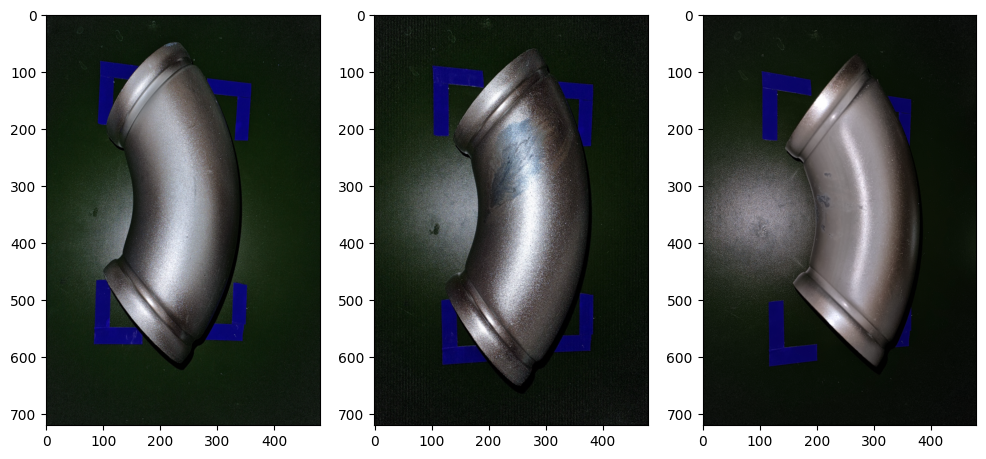

In [2]:
img_ok = cv.imread('C:\source\kamp_ex\image\KEMP_IMG_DATA_1.png')
img_bad = cv.imread('C:\source\kamp_ex\image\KEMP_IMG_DATA_Error_2.png')
img_bad2 = cv.imread('C:\source\kamp_ex\image\KEMP_IMG_DATA_Error_12.png')

fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)
axs[0].imshow(img_ok)
axs[1].imshow(img_bad)
axs[2].imshow(img_bad2)
# plt.imshow(img_ok)
# plt.imshow(img_bad)
# cv.imshow('img_ok', img_ok)
# cv.waitKey(0)
# cv.destroyAllWindows()

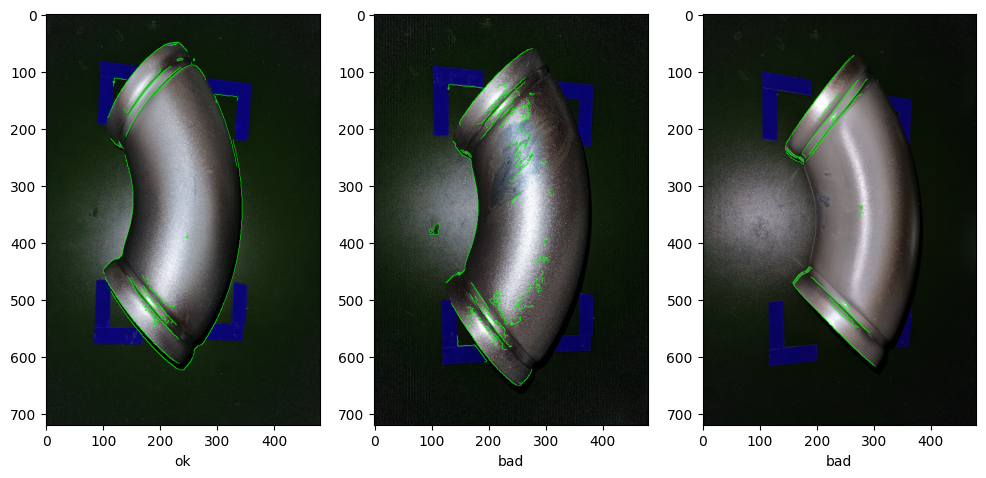

In [3]:

# 이미지 읽기
# image = cv.imread('path_to_image.jpg')
# image = np_array[50]

# 그레이스케일로 변환
gray = cv.cvtColor(img_ok, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img_bad, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img_bad2, cv.COLOR_BGR2GRAY)

# 블러링을 통해 노이즈 제거 (선택적)
blurred = cv.GaussianBlur(gray, (5, 5), 0)
blurred2 = cv.GaussianBlur(gray2, (5, 5), 0)
blurred3 = cv.GaussianBlur(gray3, (5, 5), 0)

# 엣지 검출 (Canny 알고리즘)
edges = cv.Canny(blurred, 50, 150)
edges2 = cv.Canny(blurred2, 50, 150)
edges3 = cv.Canny(blurred3, 50, 150)

# 윤곽선 검출
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 원본 이미지에 윤곽선 그리기
cv.drawContours(img_ok, contours, -1, (0,255,0), 1)  # 녹색 (0, 255, 0), 두께 2
contours, _ = cv.findContours(edges2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_bad, contours, -1, (0,255,0), 1)  # 녹색 (0, 255, 0), 두께 2
contours, _ = cv.findContours(edges3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_bad2, contours, -1, (0,255,0), 1)  # 녹색 (0, 255, 0), 두께 2
# 이미지 표시
fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)
axs[0].set_xlabel('ok')
axs[1].set_xlabel('bad')
axs[2].set_xlabel('bad')
axs[0].imshow(img_ok)
axs[1].imshow(img_bad)
axs[2].imshow(img_bad2)

In [9]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label and the
        wind

In [6]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on